## 1- Import packages

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## 2- Load the data

In [2]:
housing= pd.read_csv("/Users/AA/Desktop/Python projects/Kaggle king town housing prediction /kc_housing.csv")
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## 3- Quick understanding of the data

#### a- table structure 

In [3]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


#### b- infromation on columns 

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### c- aggregate information on each column 

In [5]:
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00"
mean,"4,580,301,520.86","540,088.14",3.37,2.11,"2,079.90","15,106.97",1.49,0.01,0.23,3.41,7.66,"1,788.39",291.51,"1,971.01",84.40,"98,077.94",47.56,-122.21,"1,986.55","12,768.46"
std,"2,876,565,571.31","367,127.20",0.93,0.77,918.44,"41,420.51",0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,"27,304.18"
min,"1,000,102.00","75,000.00",0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00
25%,"2,123,049,194.00","321,950.00",3.00,1.75,"1,427.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00",0.00,"1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00"
50%,"3,904,930,410.00","450,000.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00",0.00,"1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00"
75%,"7,308,900,445.00","645,000.00",4.00,2.50,"2,550.00","10,688.00",2.00,0.00,0.00,4.00,8.00,"2,210.00",560.00,"1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00"
max,"9,900,000,190.00","7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","4,820.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00"


#### d- histogram of all the columns

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

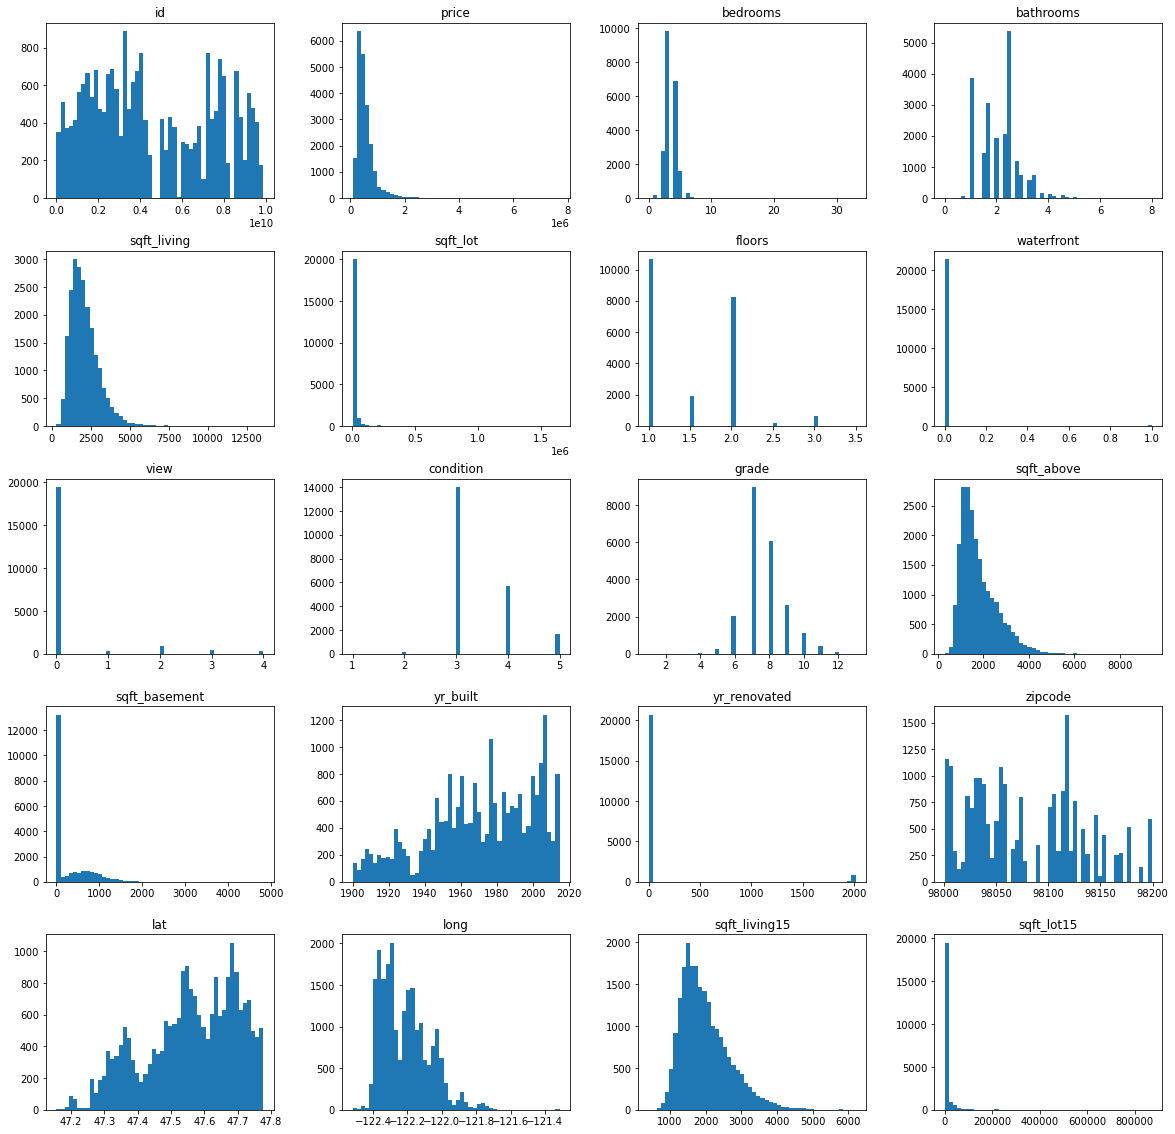

In [6]:
housing.hist(figsize=(20,20), grid=False, bins=50)

## 4- Create test set

#### stratified sampling
since sqft_living is highly correlated to the price, we might want to do stratified sampling based on that variable

In [7]:
# create bins for the stratefied sampling
housing["area_category"]=pd.cut(housing.sqft_living,bins=[0,1000,2000,3000,4000, np.inf],labels=['1','2','3','4','5'])

In [8]:
# use the Sklearn StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [9]:
# Split the data by the area_category column 
for housing_train_set_index, housing_test_set_index in split.split(housing, housing["area_category"]):
    housing_train_set= housing.loc[housing_train_set_index]
    housing_test_set= housing.loc[housing_test_set_index]

In [10]:
for i in housing_train_set, housing_test_set:
    i.drop("area_category", axis=1, inplace=True)

In [11]:
# create a copy of the train set 
housing= housing_train_set.copy()

## 5- Discover and visualize to gain insight

#### a- Plotting long and lat points

<AxesSubplot:xlabel='long', ylabel='lat'>

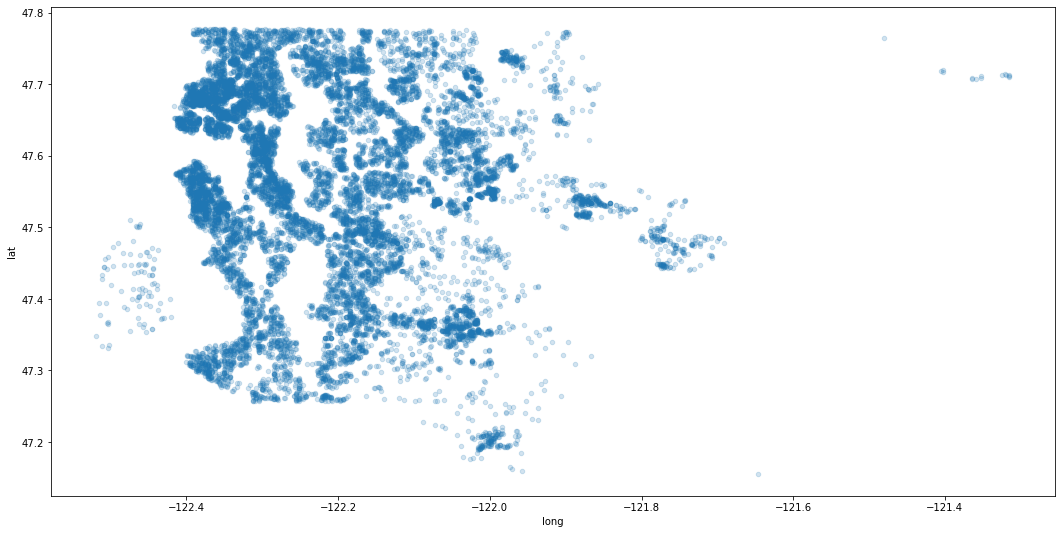

In [12]:
housing.plot(kind="scatter", x="long", y="lat", alpha=0.2, figsize=(18,9), fontsize=10)

#### b- Plotting long and lat points and price level

<AxesSubplot:xlabel='long', ylabel='lat'>

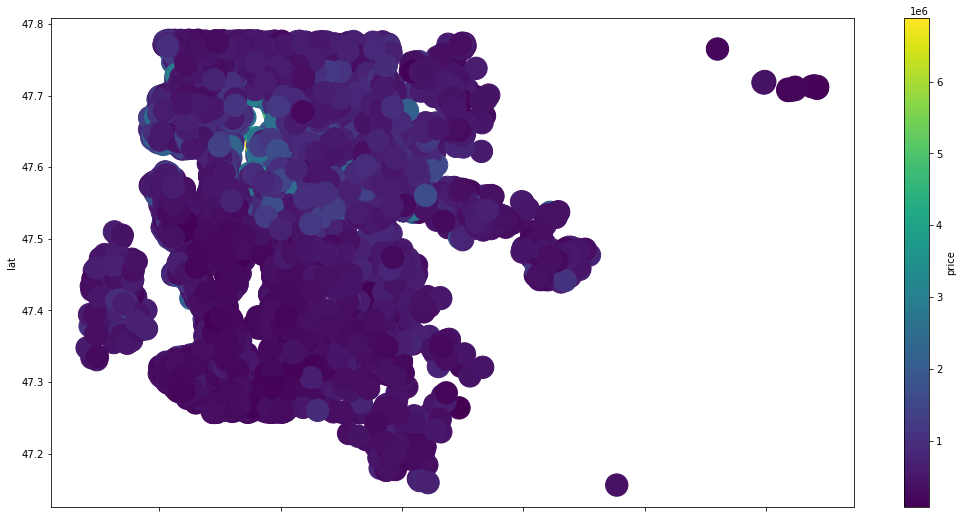

In [13]:
housing.plot(kind="scatter", x="long", y="lat", alpha=1, figsize=(18,9), fontsize=10, c="price",  cmap=plt.get_cmap(), colorbar= True, s=500)

#### c- Plot correlation matrix 

In [14]:
corr_matrix=housing.corr()

#### c.a-Plot as a simple table 

In [15]:
corr_matrix["price"].sort_values(ascending=False)

price            1.00
sqft_living      0.70
grade            0.67
sqft_above       0.61
sqft_living15    0.59
bathrooms        0.52
view             0.39
sqft_basement    0.32
bedrooms         0.31
lat              0.31
waterfront       0.26
floors           0.26
yr_renovated     0.11
sqft_lot         0.09
sqft_lot15       0.09
yr_built         0.06
condition        0.04
long             0.03
id              -0.01
zipcode         -0.06
Name: price, dtype: float64

#### c.b-Plot graph

<AxesSubplot:>

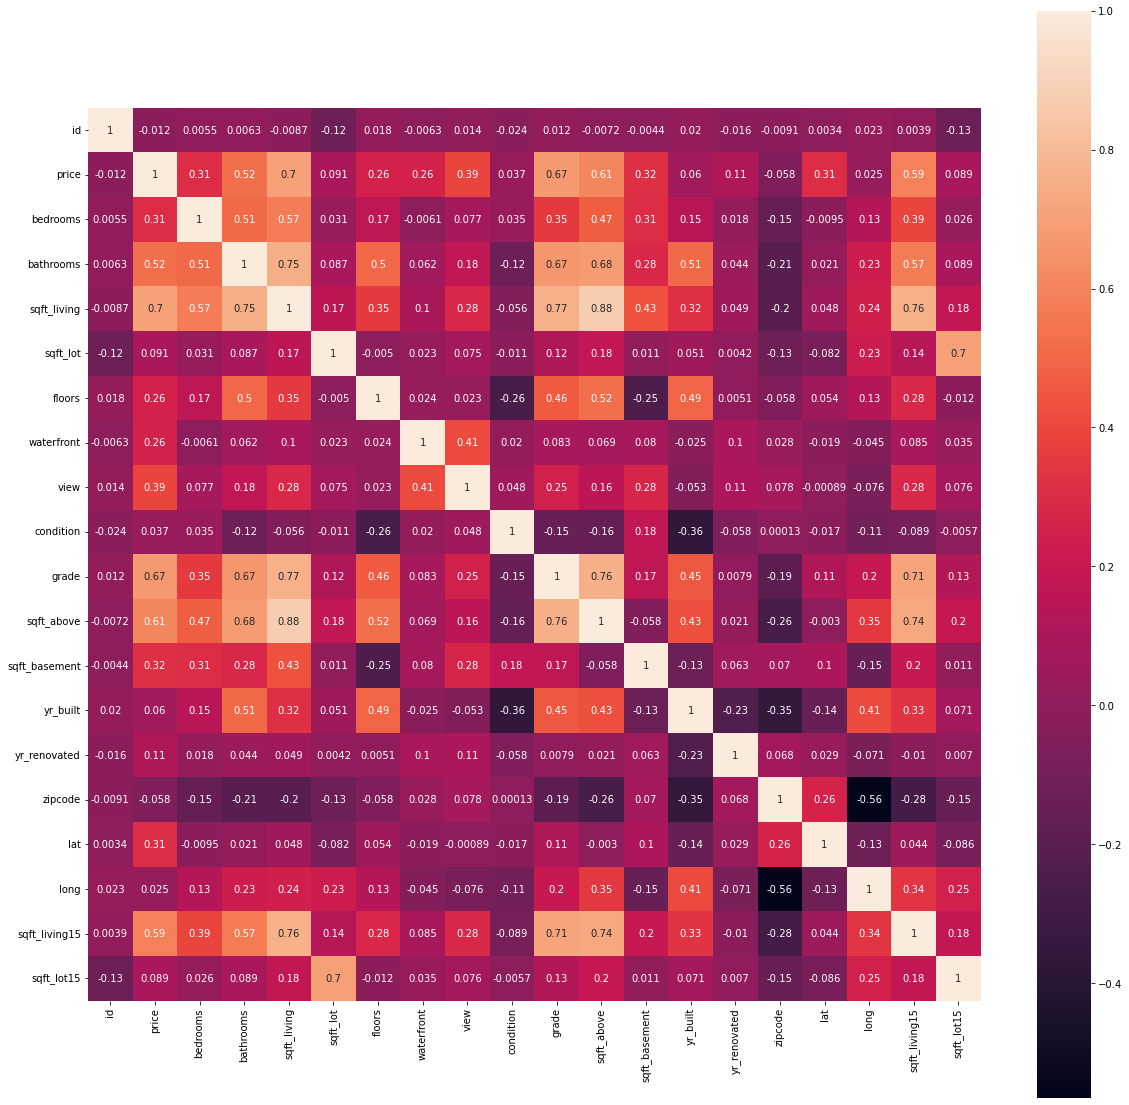

In [16]:
plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, vmax=1, square=True, annot= True)

#### d- Plotting scatter plots between highly correlated attributes

In [17]:
attributes=["price", "sqft_living", "grade", "sqft_above", "sqft_living15"]

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='grade', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living15', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='grade', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_living15', ylabel='sqft_living'>],
       [<AxesSubplot:xlabel='price', ylabel='grade'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='grade'>,
        <AxesSubplot:xlabel='grade', ylabel='grade'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='grade'>,
        <AxesSubplot:xlabel='sqft_living15', ylabel='grade'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_above'>,
        <AxesSubplot:xlabel='sqft_living'

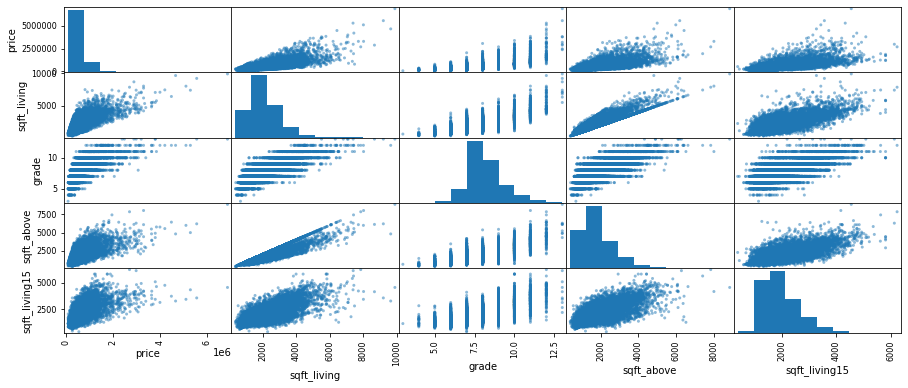

In [18]:
scatter_matrix(housing[attributes], figsize=(15,6))

## 6- Prepare the data for machine learning algorithms

#### drop the column to predict 

#### a- dataframe without the dependent column

In [19]:
housing= housing_train_set.drop("price", axis=1)

In [20]:
housing

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20474,993000315,20141002T000000,3,3.25,1380,1234,3.00,0,0,3,8,1380,0,2006,0,98103,47.69,-122.34,1370,1282
3840,522059013,20140612T000000,2,1.00,820,10450,1.00,0,0,4,7,820,0,1965,0,98055,47.43,-122.20,1240,11200
7426,2524000050,20141212T000000,3,3.50,4240,21578,2.00,0,0,3,10,3500,740,1994,0,98040,47.56,-122.22,3120,16440
4038,3277801450,20150415T000000,4,1.00,1140,6250,1.50,0,0,3,6,1140,0,1958,0,98126,47.54,-122.38,1140,1370
11420,7202290320,20141024T000000,3,2.50,1600,3172,2.00,0,0,3,7,1600,0,2002,0,98053,47.69,-122.04,1690,3698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,1254200835,20140813T000000,4,1.75,2000,5100,1.00,0,0,4,7,1130,870,1949,0,98117,47.68,-122.39,1540,5100
8505,1237500540,20141021T000000,3,1.75,1370,10866,1.00,0,0,4,6,1370,0,1945,0,98052,47.68,-122.16,1580,14250
549,5000500055,20140528T000000,2,1.00,1320,8865,1.00,0,0,4,6,1320,0,1943,0,98168,47.49,-122.30,1190,6490
4482,2919701944,20141010T000000,3,1.00,1140,4560,1.00,0,0,4,6,770,370,1944,0,98117,47.69,-122.36,1340,3980


#### b- the dependent column

In [21]:
housing_label= housing_train_set["price"].copy()

In [22]:
housing_label

20474     379,000.00
3840      173,000.00
7426    1,393,000.00
4038      390,000.00
11420     440,500.00
            ...     
14469     595,000.00
8505      225,000.00
549       215,000.00
4482      474,000.00
1941      998,000.00
Name: price, Length: 17290, dtype: float64

## 7- Create pipeline  

#### a- create a column dropper class to add to the pipeline 

In [23]:
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

transformer = FunctionTransformer(np.log1p, validate=True)

#### b- drop unecessary columns

In [24]:
housing_dropper=columnDropperTransformer(["date", "lat", "long", "id"])
housing_q=housing_dropper.transform(housing)

## 8- Feature scaling

#### a- create a pipeline 
- add the custom transformer class you created above and specify its arguments 
- import StandardScaler and include it in the pipline

In [25]:
num_pipline= Pipeline([("column_droper",columnDropperTransformer(["date", "lat", "long", "id", ])),
                       ("std_scaler", StandardScaler())])

#### b- use the pipeline to fit the data

In [26]:
housing= num_pipline.fit_transform(housing)

## 9- Apply machine learning models 

#### a- apply the decision tree regressor ML model and show the performance

In [27]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing, housing_label)

#now lets train the model
pricing_prediction = tree_reg.predict(housing)

score=r2_score(housing_label,pricing_prediction)
print("r2 score= ", score)
print("mean_sqrd_error=",mean_squared_error(housing_label,pricing_prediction))
print("root_mean_squared error=",np.sqrt(mean_squared_error(housing_label,pricing_prediction)))
print("mean_absolute_error=",mean_absolute_error(housing_label,pricing_prediction))

r2 score=  0.9992722769428577
mean_sqrd_error= 95004352.90116638
root_mean_squared error= 9747.017641369404
mean_absolute_error= 892.4912859070754


#### c- show the real prices and the predictes prices 

In [28]:
tree_reg.fit(housing, housing_label)
#now lets train the model
pricing_predictions= tree_reg.predict(housing)
pd.DataFrame(zip(housing_label, pricing_predictions), columns=["Price_real", "Price_prediction"])

,Price_real,Price_prediction
0,"379,000.00","379,000.00"
1,"173,000.00","173,000.00"
2,"1,393,000.00","1,393,000.00"
3,"390,000.00","390,000.00"
4,"440,500.00","440,500.00"
...,...,...
17285,"595,000.00","595,000.00"
17286,"225,000.00","247,500.00"
17287,"215,000.00","215,000.00"
17288,"474,000.00","474,000.00"
